<a href="https://colab.research.google.com/github/SmirnygaTotoshka/FBB_Courses/blob/main/ML_in_Bio_Lec_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация 

Напомню, что в **unsupervised learning** ставится задача о поиске структуры в данных. Например, 

пусть $X$ - признаковое пространство объектов, дана $\{x_1, \ldots, x_l\}\subset X$ - выборка<br>
и определена функция расстояний между объектами $\rho: X\times X\rightarrow[0,\infty)$. 

**Хотим найти:**<br>
$Y$ - множество кластеров;
$a: X\rightarrow Y$ - алгоритм кластеризации такой, что в результате его работы выполняется:   
* объекты внутри одного кластера похожи;   
* объекты разных кластеров различны.

### Решение задачи кластеризации **принципиально** неоднозначно! 

**Более того...**

## Теорема Клейнберга

Для множества объектов, состоящего из двух и более объектов, не существует алгоритма кластеризации, который являлся бы **одновременно** *масштабно-инвариантным*, *согласованным* и *полным*.

### Масштабная инвариантность

Если для любых функции расстояния $\rho$ и константы $a$ результат кластеризации для расстояний между объектами $D_X$ совпадает с результатов кластеризации для расстояний $a * D_X$, то такой алгоритм кластеризации называется масштабно-инвариантным.

### Согласованность

Алгоритм кластеризации называется согласованным, если результат кластеризации не меняется при любом уменьшении расстояния между объектами из одного кластера или увеличении расстояния между объектами из разных кластеров.

### Полнота 

Алгоритм кластеризации обладает полнотой, если для любого заданного разбиения объектов на кластеры можно подобрать такие параметры алгоритма, что он разобъёт объекты тем же образом.

### Раз всё так плохо

Давайте начнём с самых базовых рекомендаций:

* Думайте критически (не только про кластеризацию) и не ждите от кластеризации чудес. Она довольно часто может являться субъективным подгоном под желаемое (даже неосознанным).
* Кластеризация лучше всего валидируется на данных, где есть ground truth разметка (не удивительно!). Считаем и оптимизируем разные метрики качества.
* Стоит кластеризовать данные несколько раз с разными инициализациями генератора псевдослучайных чисел, добавлять к ним шум, смотреть на устойчивость структуры кластеров.
* Существуют некоторые метрики, по которым можно эмпирически оценивать, насколько в данных вообще есть структура, либо насколько одна кластеризация лучше другой.<br> 

Например, **статистика Хопкинса**.<br>
Она считается следующим образом: генерируется $p$ случайных точек из равномерного распределения и сэмплируется $p$ случайных точек из реальной выборки. Считаются $w_i$ — расстояние от i-ой случайной точки до ближайшей случайной, $u_i$ — расстояние от i-ой точки из реальной выборки до другой ближайшей точки из реальной выборки.<br> Итоговая статистика выглядит как: 
$$H = \frac{\sum_{i=1}^{p}{u_i}}{\sum_{i=1}^{p}{w_i} + \sum_{i=1}^{p}{u_i}}$$
Если $H << 0.5$, то это значит, что в данных объекты как-то группируются.


Ещё существует **коэффициент силуэта для объекта**:
$$s = \frac{b - a}{max(a, b)}, s \in [-1, 1]$$
где $a$ — среднее расстояние от данного объекта до других объектов из того же кластера,</br>
$b$ — среднее расстояние от данного объекта до объектов из ближайшего другого кластера.<br>
Можно посчитать среднее значение коэффициента силуэта по всей выборке, а также распределения по кластерам, посмотреть, есть ли кластеры, у которых среднее значение силуэта ниже среднего по выборке. Если есть, то сменить число кластеров/метод кластеризации.

Алгоритмы кластеризации можно разделить на те, которым нужно заранее указывать число кластеров и те, которые сами находят его из данных (при учёте остальных гиперпараметров). Также кластеризация бывает иерархической (вспомним <a href='https://en.wikipedia.org/wiki/UPGMA'>UPGMA</a>, знакомый нам из биоинформатики), которая в свою очередь бывает top-down или bottom-up.<br> 
Тысячи их...

**Сравнение кучи алгоритмов на игрушечных данных**<br>
Можете почитать про наиболее заинтересовавшие Вас самостоятельно. 
![toy_clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

## Некоторые методы 

### k-Means

Задано число кластеров - $k$. Случайно выбираем $k$ точек (не обязательно объектов) - центры кластеров. Каждой остальной точке приписываем номер кластера в зависимости от того, к какому центру она ближе. Пересчитываем центры кластеров как среднее по объектам кластера. Заново приписываем номера точкам. Итерируемся, пока не сошлось. 

По сути, итеративно минимизируется среднее внутрикластерное расстояние до центра кластера: 

$$F = \sum_{y \in Y}{\frac{1}{\lvert K_y \rvert}}\sum_{i: y_i = y}{\rho^2(\mathbf{x}_i, \mathbf{\mu_y})} \to min$$
$\mathbf{\mu_y}$ - центр кластера $y$.

![kmeans1](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/187px-K_Means_Example_Step_1.svg.png)
![kmeans2](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/209px-K_Means_Example_Step_2.svg.png)
![kmeans3](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/209px-K_Means_Example_Step_3.svg.png)
![kmeans4](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/209px-K_Means_Example_Step_4.svg.png)

![kmeans](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/330px-K-means_convergence.gif)

Если на центры накладывается условие, что это обязательно объекты выборки, тогда алгоритм называется k-medoids.

K-means++ - метод с более хитрой инициализацией. Первый центр - случайный объект из выборки (равновероятно). Далее объекты взвешиваются так, что вероятность выбрать точку следующим центром зависит от квадрата расстояния от этой точки до ближайшего центра (хотим центры подальше друг от друга). 

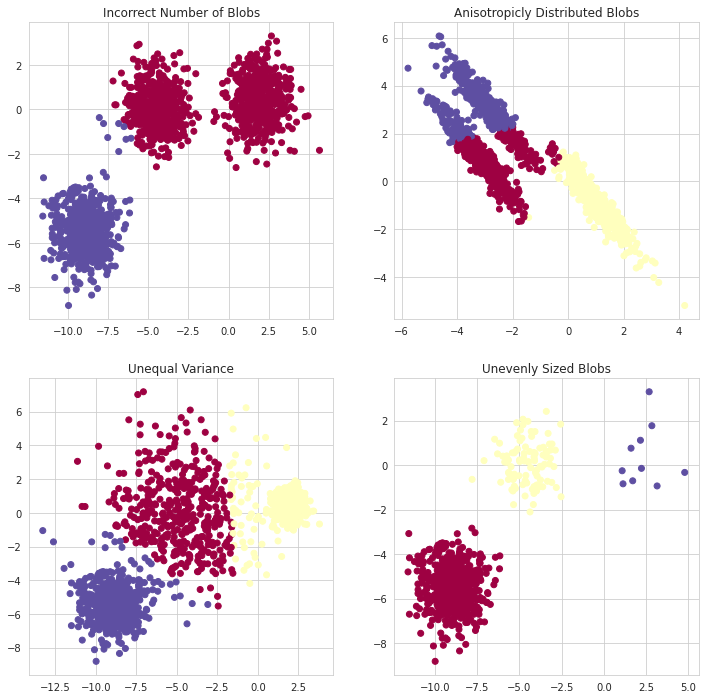

In [ ]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], cmap='Spectral', c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], cmap='Spectral', c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], cmap='Spectral', c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], cmap='Spectral', c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

Не самая плохая идея использовать k-Means, если нам надо "огрублять" наши признаки - каких-то категорий слишком много, а мы хотим поменьше (например, количество цветов изображения). Тогда скластеризуем исходные значения, и как новый признак будем использовать метку кластера. 

### EM-algorithm

**Задача разделения смеси распределений**<br>
Считаем, что наши данные порождаются распределением в вида $p(x) = \sum_{i=1}^{N}w_ip_i(x)$, т.е. взвешенной суммой распределений $p_i(x) = \phi(\theta_i; x)$. Мы предполагаем, что знаем семейство распределений. 

![gmm](https://www.statisticshowto.com/wp-content/uploads/2016/05/Gaussian-mixture-example.svg_.png)

Мы, имея выборку и зная $N$, хотим оценить вектор весов и параметров распределений.<br>
Это делается EM-алгоритмом: <br>
* E-шаг - оценка скрытых переменных при фиксированном векторе весов (неизвестная апостериорная вероятность $j$-го объекта принадлежать к $i$-ому кластеру). $$g_{ij} = p(i|x_j) = \frac{w_ip_i(x_i)}{p(x_i)}$$
* M-шаг - обновление вектора весов и параметров распределений при фиксированном векторе скрытых переменных. $$w_i = \frac{1}{N}\sum_{j=1}^{N}{g_{ij}}$$
$$\theta_i = argmax_{\theta}\sum_{j=1}^{N}{g_{ij}*ln\phi(\theta; x)}$$

![EM](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

### DBSCAN

В одной из реализаций звучит примерно так:<br>
* Точка считается коровой (основной), если в её окрестности $\rho$ есть более $k$ точек.<br>
* Точка считается граничной, если в её окрестности есть основные точки, но суммарно соседних точек меньше $k$. (иногда граничные не рассматриваются)<br>
* Точка считается шумовой, если в её окрестности меньше $k$ точек, среди них нет основных.<br> 
* Отнесём все точки выборки к одному из трёх классов. Каждая группа основных точек (с прилегающими к ним граничными) - кластер. Шумовые точки не относятся ни к какому кластеру (*отказ от кластеризации*).

![dbscan](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

In [ ]:
def plot_dbscan(X, labels, core_samples_mask, n_clusters_):
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  plt.figure(figsize=(8,8))
  for k, col in zip(unique_labels, colors):
      if k == -1:
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 18


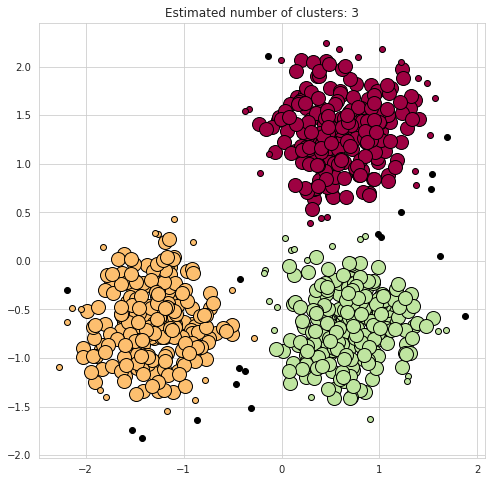

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
plot_dbscan(X, labels, core_samples_mask, n_clusters_)

Estimated number of clusters: 1
Estimated number of noise points: 25


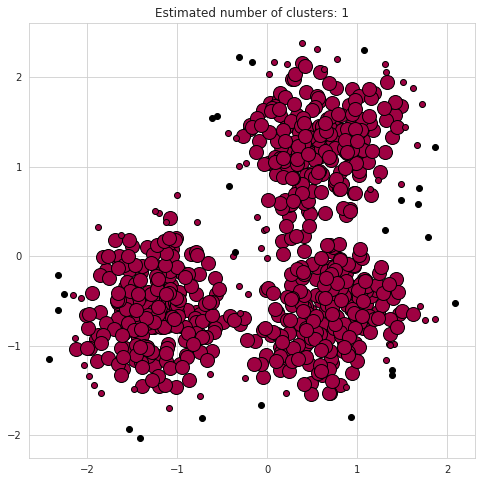

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.5,
                            random_state=0)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
plot_dbscan(X, labels, core_samples_mask, n_clusters_)

Упс.

### Affinity propagation

Интуиция: 

* У каждой точки есть некоторая предрасположенность стать типовым экземпляром кластера - "ответственность" (responsibility).
* У каждой точки есть некоторая предрасположенность войти в кластер, где типовым экземпляром является другая точка - "доступность" (availability).
* Итеративно обновляя некоторым образом две матрицы этих предрасположенностей, можно выделить типовые экземпляры (центры) кластеров и их окружение. 

![dbscan](https://media.geeksforgeeks.org/wp-content/uploads/20190513203939/ec9ac2ea-aff8-42a3-b3dc-703ee4cab64c.png)


Пусть $\{x_1, \ldots, x_n\}$ - выборка без каких-либо предположений об их внутренней структуре, и пусть $s$ будет функцией, которая количественно определяет сходство между любыми двумя точками, так что $s (i, j)> s (i, k)$ тогда, когда $x_i$ больше похож на $x_j$, чем на $x_k$. 

Составим матрицу $S$ с попарными значениями функции $s$. Диагональ матрицы $S$ особенно важна, она и представляет собой "ответственность" объекта, отражающее то, насколько вероятно конкретный объект станет типовым экземпляром. **Это гиперпараметр,** который контролирует, сколько кластеров найдёт алгоритм.

Суть алгоритма заключается в одновлении значений двух матриц:

* Матрица «ответственности» $R$ имеет значения $r (i, k)$, которые количественно определяют, насколько хорошо подходит $x_k$, чтобы служить экземпляром для $x_i$, по сравнению с другими объектами-кандидатами.
* Матрица «доступности» $A$ содержит значения $a (i, k)$, которые представляют, насколько «уместно» для $x_i$ выбрать $x_k$ в качестве экземпляра, принимая во внимание предпочтение $x_k$ в качестве экземпляра другими точками.

Обе матрицы инициализируются всеми нулями (и в принципе их можно рассматривать как таблицы логарифма вероятности). Затем алгоритм итеративно выполняет следующие обновления:

Сначала обновления ответственности: $$r (i, k) \leftarrow s (i, k) - \max_{k' \neq k} (a (i, k') + s ( i, k '))$$

Затем доступности:
$$a (i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \not \in {i, k}} \max(0, r( i', k)))$$ для  $i \neq k$

и 
 
$a(k, k) \leftarrow \sum_ {i' \neq k} \max (0, r(i', k))$.

Итерации выполняются до тех пор, пока либо границы кластера не останутся неизменными в течение нескольких итераций, либо не будет достигнуто некоторое заранее определенное количество итераций. Экземпляры извлекаются из окончательных матриц как те, чья «ответственность + доступность» для себя положительна (т.e. $r (i, i) + a (i, i) > 0$.

## Иерархическая кластеризация

Есть два подхода к иерархической кластеризации:

* Top-down (division) - объединить все объекты в один кластер, после чего его последовательно разбивать на подкластеры. 
* Bottom-up (agglomerative) - вначале каждый объект - отдельный кластер, после чего их последовательно соединять.

Как правило применяют методы из второй группы, разберём шаги поподробнее:

1. Посчитать попарную матрицу расстояний между объектами;
2. Присвоить каждому объекту свой кластер;
3. Слить кластеры, которые находятся друг с другом на наименьшем расстоянии;
4. Пересчитать расстояния от получившегося кластера до всех остальных;
5. Повторять шаги 3-4, пока не останется один кластер.

![wheat](https://media.proglib.io/wp-uploads/2018/05/Wheat.png)

Способы подсчёта расстояний между объектами:

* Nearest point algorithm (единичная связь) $$d(u,v) = \min(dist(u[i],v[j]))$$

* Farthest Point Algorithm (полная связь) $$d(u, v) = \max(dist(u[i],v[j]))$$

* UPGMA (невзвешенная средняя связь) $$d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{(|u|*|v|)}$$

* WPGMA (взвешенная средняя связь) $$d(u,v) = (dist(s,v) + dist(t,v))/2$$

* UPGMC (центроидный метод) $$d(u,v) = ||c_u-c_v||_2$$

* Ward distance (учёт прироста дисперсии) $$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2 + \frac{|v|+|t|}{T}d(v,t)^2 + \frac{|v|}{T}d(s,t)^2}$$ 

где $u$ - вновь присоединенный кластер, состоящий из кластеров $s$ и $t$, $v$ - неиспользуемый кластер,  $T = | v | + | s | + | t |$. Прирост суммы квадратов расстояний объектов до центра кластера должен быть минимальным при объединении кластеров.

## Примеры из биологии

### Филогенетическая реконструкция 

Задача филогенетической реконструкции заключается в построении связного ациклического графа, отражающего эволюционные связи между биологическими объектами, например, белковыми доменами, генами или видами организмов. Для такого построения может использоваться различная информация о данных объектах, например, белковые последовательности доменов, последовательности ДНК генов, морфологические признаки видов либо их полные геномы и многое другое. 

Полученный граф называется дендрограммой, а также филогенетическим, или эволюционным, деревом. 

В структуре филогенетического дерева могут встречаться следующие элементы:
* узел – внутренняя вершина графа, представляющая собой точку разделения предкового биологического объекта на двух независимо эволюционирующих потомков;
* лист – внешняя вершина графа, соответствующая современному рассматриваемому биологическому объекту; 
* ветвь – ребро графа, обозначающая связь между гипотетически существующими или реальными объектами;
* корень – ближайший общий предок (MRCA) всех представленных в дереве биологических объектов;
* клада – группа объектов, включающая некоторого предка и всех его потомков.  


Подробнее обсудим на семинаре. 

### Анализ данных экспрессии

Кластеризация производится перед анализом дифференциальной экспрессии в качестве quality check (убедиться, что данные действительно приходят из нескольких отличающихся групп).

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/clustering/heatmap.png" alt="Drawing" width= "600px;"/>

### Опухолевые портреты 

Работа по кластеризации опухолей на основе их микроокружения и свойств злокачественных клеток.

Было подготовлено 29 функциональных сигнатур генной экспрессии, связанных с основными клеточными процессами опухоли (скорость пролиферации и сигнатура эпителиально-мезенхимального перехода) и её микроокружения (разные типы иммунного инфильтрата, фиброз, ангиогенез и пр.). 

На основе ssGSEA-скоров (single-sample geneset enrichment analysis) этих сигнатур была произведена кластеризация образцов кожной меланомы <a href='https://arxiv.org/pdf/1410.1237.pdf'>методом Лувена</a>. 

Получилось выделить 4 подтипа опухолей (т.н. "портретов") в зависимости от микроокружения. Портреты хорошо коррелируют с выживаемостью и ответом на иммунотерапию. 

Более того, эти подтипы оказались устойчивыми в разных диагнозах, что было провалидировано на датасете, составленном из множества датасетов различных карцином и меланом. 

Source: https://doi.org/10.1016/j.ccell.2021.04.014

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/clustering/portraits.png" alt="Drawing" width= "1000px;"/>

### Поиск сообществ методом Лувена

***Задача поиска сообществ***.

Пусть $G (V, E, ω)$ - неориентированный взвешенный граф, где $V$ - множество
вершин, $E$ - множество ребер, а $ω (.)$ - весовая функция ребра. Во входном графе разрешены ребра, которые соединяют вершину с самой собой, то есть $(i, i)$ может быть допустимым ребром. Обозначим список смежности $i$ через $Γ (i) = {j | (i, j) ∈ E}$. Обозначим через $k_i$ взвешенную степень вершины $i$, т. e. $K_i = \sum_{∀j∈Γ(i)} ω (i, j)$. 

$n$ - количество вершин в $G$; 

$M$ - количество ребер в графе; 

$m$ - сумма всех весов ребер.

***Сообщество*** в графе $G$ представляет собой некоторое подмножество $V$, на практике для обнаружения сообществ нас интересует разбиение множества вершин $V$ на *произвольное количество* *непересекающихся* *непустых* сообществ *произвольного размера*. 

* $C (i)$ - сообщество, которое содержит вершину $i$ в данном разбиении $V$;
* $E_{i → C}$ - множество всех ребер, соединяющих вершину $i$ с вершинами в сообществе $C$;
* $e_{i → C}$ - сумма весов ребер в $E_{i → C}$;
* $a_C$ - сумма степеней всех вершин в сообществе $C$, или степень сообщества.

***Модулярность***. Пусть $P = \{C_1, C_2,. . . C_k\}$ обозначает множество всех сообществ в данном разбиении множества вершин $V$ в $G (V, E, ω)$, где $1 ≤ k ≤ n$. 
Тогда модулярность разбиения $P$ задается следующим выражением:
$$Q = \frac{1}{2m} \sum_{∀i∈V} e_{i → C (i)} - \sum_{∀C∈P} (\frac{a_C}{2m} · \frac{a_C}{2m})$$
Графы с высокой модулярностью имеют плотные связи между узлами внутри сообществ, но слабые связи между узлами в различных сообществах. 

***Обнаружение сообщества***. Задача обнаружения сообщества состоит в том, чтобы найти разбиение $P$, которое максимизирует модулярность. Количество кластеров и их размеры заранее неизвестны.


***Алгоритм Лувена***.

Основная идея алгоритма довольно проста и может быть резюмирована следующим образом:
* Начинаем с ситуации, когда каждая вершина - отдельное сообщество; 
* Далее - итеративно:
  * сканируются вершины, для каждой вершины $i$ считается прирост модулярности, который мог бы возникнуть, если бы $i$ переместилась в некоторое из этих соседних сообществ из текущего сообщества;
  * алгоритм назначает соседнее сообщество, которое дало бы максимальный прирост модулярности как новое сообщество для $i$. Если все приросты оказываются отрицательными, вершина остается в своем текущем сообществе;
  * итерация заканчивается после того, как все вершины просканированы таким образом. 
  
После завершения этой фазы алгоритм переходит к следующей фазе: 
* сворачиваются все вершины сообщества в одну «метавершину» (или «супервершину»); 
* проводится ребро от этой метавершины к самой себе с весом, который является суммой весов всех рёбер внутри сообщества; 
* проводится ребро между двумя метавершинами с весом, равным сумме весов всех "межобщинных" ребер между соответствующими двумя сообществами. 

Результатом является сжатый граф $G' (V', E', ω')$, который затем становится входом в следующую итерацию. Выполняется несколько итераций, пока не сойдется оценка модулярности. Таким образом, каждая итерация представляет собой более грубый уровень иерархии в процессе обнаружения сообщества.

![louvain](https://dist.neo4j.com/wp-content/uploads/20190315074208/louvain-modularity-algorithm-2.png)

### Кластеризация структур 

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 18.6 MB 1.2 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem


#Define clustering setup
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [ ]:
ms = [x for x in Chem.SDMolSupplier('Approveddrugslibrary.sdf', removeHs=False)]
len(ms)

1700

In [ ]:
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 2048) for x in ms]

In [ ]:
clusters=ClusterFps(fps,cutoff=0.4)

In [ ]:
print(clusters[0])

(527, 117, 159, 161, 506, 644, 741, 742, 745, 1025)


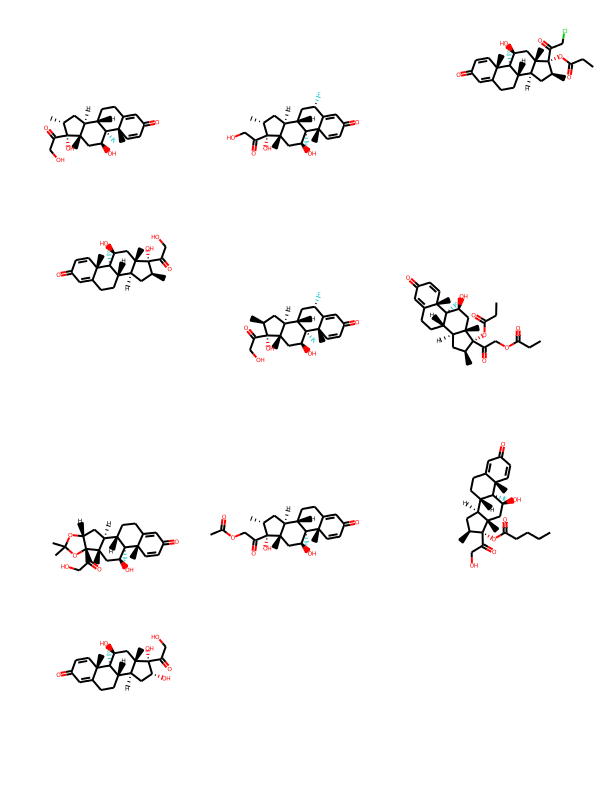

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

mols=[ms[i] for i in clusters[0]]
Draw.MolsToGridImage(mols)